In [ ]:
import pandas as pd
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
response = requests.get(url)

with open("australian_credit_approval.csv", "w") as f:
    f.write(response.text)

# Load CSV file as a pandas DataFrame
df = pd.read_csv("australian_credit_approval.csv", sep=" ", header=None)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load CSV file as a pandas DataFrame
df = pd.read_csv("australian_credit_approval.csv", sep=" ", header=None)

# Define number of samples to generate
num_samples = 10

# Generate 10 different sets of training and testing data
for i in range(num_samples):
    # Split dataset into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=i)
    
    # Print the number of samples in each set
    print(f"Sample {i+1}: Training data: {len(X_train)}, Testing data: {len(X_test)}")


Sample 1: Training data: 483, Testing data: 207
Sample 2: Training data: 483, Testing data: 207
Sample 3: Training data: 483, Testing data: 207
Sample 4: Training data: 483, Testing data: 207
Sample 5: Training data: 483, Testing data: 207
Sample 6: Training data: 483, Testing data: 207
Sample 7: Training data: 483, Testing data: 207
Sample 8: Training data: 483, Testing data: 207
Sample 9: Training data: 483, Testing data: 207
Sample 10: Training data: 483, Testing data: 207


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load CSV file as a pandas DataFrame
df = pd.read_csv("australian_credit_approval.csv", sep=" ", header=None)

# Define the features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into 10 samples of 70-30 split
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test})


In [ ]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
response = requests.get(url)

with open("australian_credit_approval.csv", "w") as f:
    f.write(response.text)

# Load CSV file as a pandas DataFrame
df = pd.read_csv("australian_credit_approval.csv", sep=" ", header=None)

# Define SVM classifier with default hyperparameters
svm = SVC()

# Divide the dataset into 10 different samples with 70% training data and 30% testing data
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=i)

    # Fit SVM classifier to the training data
    svm.fit(X_train, y_train)

    # Predict on the test data using the trained SVM classifier
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the classifier on the test data
    acc = accuracy_score(y_test, y_pred)

    # Print the accuracy of the classifier for each sample
    print(f"Sample {i+1}: Accuracy = {acc}")


Sample 1: Accuracy = 0.6521739130434783
Sample 2: Accuracy = 0.6570048309178744
Sample 3: Accuracy = 0.6763285024154589
Sample 4: Accuracy = 0.6811594202898551
Sample 5: Accuracy = 0.6714975845410628
Sample 6: Accuracy = 0.6570048309178744
Sample 7: Accuracy = 0.6618357487922706
Sample 8: Accuracy = 0.6618357487922706
Sample 9: Accuracy = 0.642512077294686
Sample 10: Accuracy = 0.6521739130434783


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load dataset by UCI library ID
dataset_id = '60' # Replace with the ID of the dataset you want to load
dataset = fetch_openml(data_id=dataset_id, as_frame=True)

# Define SVM classifier
svm = SVC(max_iter=1000)

# Define parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto'], 'degree': [2, 3]}

# Perform grid search with 10-fold cross-validation for each sample
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.3, random_state=i)

    grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best parameters and mean cross-validation score for each sample
    print(f"Sample {i+1}: Best parameters: {grid_search.best_params_}, CV score: {grid_search.best_score_}")


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 1: Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}, CV score: 0.8677142857142858
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 2: Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}, CV score: 0.8674285714285714
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 3: Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, CV score: 0.8754285714285714
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 4: Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, CV score: 0.8742857142857142
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 5: Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, CV score: 0.8645714285714285
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Sample 6: Best parameters: {'C': 0.1, '

In [25]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import NuSVC

# Load dataset by UCI library ID
dataset_id = '60' # Replace with the ID of the dataset you want to load
dataset = fetch_openml(data_id=dataset_id, as_frame=True)

# Define NuSVC classifier
svm = NuSVC(max_iter=1000)

# Define parameter grid for grid search
param_grid = {'nu': [0.1, 0.5, 0.9]}

# Perform grid search with 10-fold cross-validation for each sample
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.3, random_state=i)

    grid_search = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best parameters and mean cross-validation score for each sample
    print(f"Sample {i+1}: Best parameters: {grid_search.best_params_}, CV score: {grid_search.best_score_}")



/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 1: Best parameters: {'nu': 0.5}, CV score: 0.8511428571428571
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 2: Best parameters: {'nu': 0.5}, CV score: 0.8537142857142858
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 3: Best parameters: {'nu': 0.5}, CV score: 0.8551428571428572
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 4: Best parameters: {'nu': 0.5}, CV score: 0.8557142857142856
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 5: Best parameters: {'nu': 0.5}, CV score: 0.8517142857142858
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 6: Best parameters: {'nu': 0.5}, CV score: 0.8548571428571428
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 7: Best parameters: {'nu': 0.5}, CV score: 0.8605714285714285
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Sample 8: Best parameters: {'

Best accuracy sample: Sample 4, Accuracy = 0.6811594202898551


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

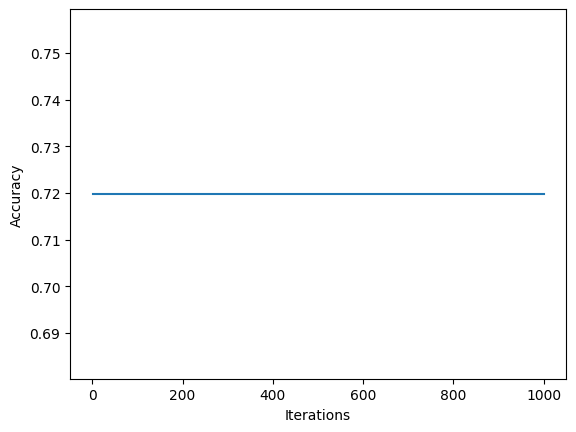

In [32]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
response = requests.get(url)

with open("australian_credit_approval.csv", "w") as f:
    f.write(response.text)

# Load CSV file as a pandas DataFrame
df = pd.read_csv("australian_credit_approval.csv", sep=" ", header=None)

# Define SVM classifier with default hyperparameters
svm = SVC()

# Divide the dataset into 10 different samples with 70% training data and 30% testing data
sample_accs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=i)

    # Fit SVM classifier to the training data
    svm.fit(X_train, y_train)

    # Predict on the test data using the trained SVM classifier
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the classifier on the test data
    acc = accuracy_score(y_test, y_pred)
    sample_accs.append((i, acc))

# Sort the samples by accuracy
sample_accs.sort(key=lambda x: x[1], reverse=True)
best_sample = sample_accs[0]
print(f"Best accuracy sample: Sample {best_sample[0]+1}, Accuracy = {best_sample[1]}")

# Set the hyperparameters to optimize and the range of values to try for each hyperparameter
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'max_iter': [1000]}
svm = SVC()
best_params = {}

# Optimize the hyperparameters for the best sample
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=best_sample[0])
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params['kernel'] = grid_search.best_params_['kernel']
best_params['C'] = grid_search.best_params_['C']
best_params['max_iter'] = grid_search.best_params_['max_iter']
svm = SVC(kernel=best_params['kernel'], C=best_params['C'], max_iter=best_params['max_iter'])
accs = []
for i in range(1, 1001):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

# Plot accuracy vs iterations
plt.plot(range(1, 1001), accs)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
